# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




In [1]:
N = 18
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
col = cols[N % 7]
col

'Time_on_Social_Media'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, chi2

plt.rcParams['figure.figsize'] = (8, 4)

In [3]:
fn = '../datasets/teen_phone_addiction_dataset.csv'
df = pd.read_csv(fn)

data = df[col]

### Часть I

In [4]:
def compute_stats(x):
    x = np.asarray(x)
    mean = np.mean(x)
    var = np.var(x, ddof=1)
    median = np.median(x)
    q25, q50, q75 = np.quantile(x, [0.25, 0.5, 0.75])
    mode = stats.mode(x)
    iqr = q75 - q25
    skew = stats.skew(x, bias=False)
    kurt_excess = stats.kurtosis(x, fisher=True, bias=False)
    return {
        'mean': mean,
        'var': var,
        'mode': mode,
        'median': median,
        'q25': q25,
        'q50': q50,
        'q75': q75,
        'skew': skew,
        'kurt_excess': kurt_excess,
        'iqr': iqr
    }

mean: 2.4992333333333336
var: 0.9765415927531399
mode: ModeResult(mode=np.float64(2.7), count=np.int64(127))
median: 2.5
q25: 1.8
q50: 2.5
q75: 3.2
skew: 0.06697299104625637
kurt_excess: -0.21322979611749737
iqr: 1.4000000000000001


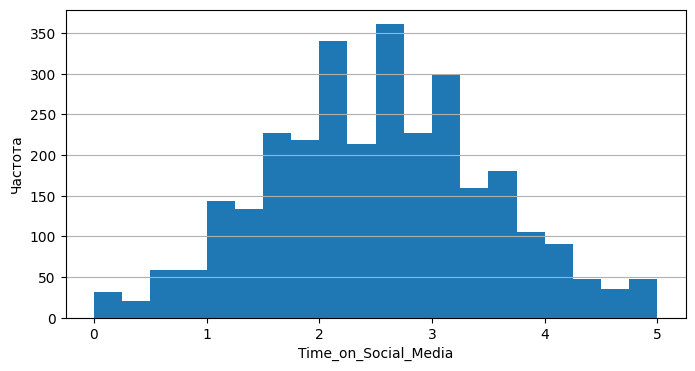

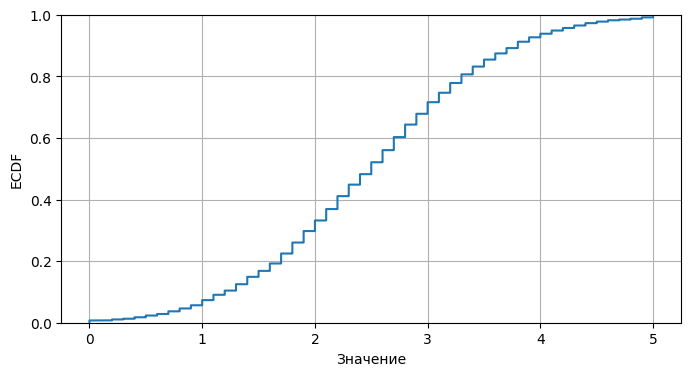

In [5]:
stats_orig = compute_stats(data)

for k,v in stats_orig.items():
    print(f'{k}: {v}')

def plot_hist(x):
    plt.figure()
    plt.hist(x, bins=20)
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.grid(axis='y')
    plt.show()

plot_hist(data)

def plot_ecdf(x):
    plt.figure()
    x_sorted = np.sort(x)
    y = np.arange(1, len(x_sorted)+1) / len(x_sorted)
    plt.step(x_sorted, y)
    plt.ylim(0,1)
    plt.xlabel('Значение')
    plt.ylabel('ECDF')
    plt.grid()
    plt.show()

plot_ecdf(data)

Довольно симметричное распределение, но заметно отличается от нормального.

### Часть II

False
9.204295203153414 0.010030271570255227


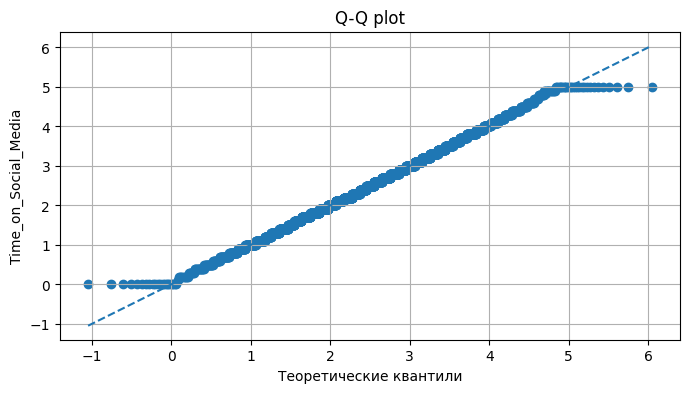

In [6]:
def chi2_test_normal(data, alpha=0.05):
    x = np.asarray(data)
    n = x.size
    m = int(np.log2(n)) + 1
    edges = np.linspace(x.min(), x.max(), m+1)
    obs, _ = np.histogram(x, bins=edges)
    mu = x.mean()
    sigma = x.std(ddof=1)
    cdf_vals = norm.cdf(edges, loc=mu, scale=sigma)
    exp_probs = cdf_vals[1:] - cdf_vals[:-1]
    exp = exp_probs * n
    chi2_stat = np.sum((obs - exp)**2 / exp)
    m_eff = exp.size
    deg = m_eff - 1 - 2
    crit_val = chi2.ppf(1 - alpha, deg)
    return chi2_stat < crit_val

chi2_res = chi2_test_normal(data)
print(chi2_res)

k2, p_normal = stats.normaltest(data)
print(k2, p_normal)

plt.figure()
sorted_x = np.sort(data)
probs = (np.arange(1, len(sorted_x)+1) - 0.5) / len(sorted_x)
theor_q = norm.ppf(probs, loc=data.mean(), scale=data.std(ddof=1))
plt.scatter(theor_q, sorted_x)
plt.plot([theor_q.min(), theor_q.max()], [theor_q.min(), theor_q.max()], linestyle='--')
plt.xlabel('Теоретические квантили')
plt.ylabel(col)
plt.title('Q-Q plot')
plt.grid()
plt.show()

Оба теста показали ложность гипотезы и нормальности данного распределения. На Q-Q графике заметно отличие от нормального.

### Часть III

In [9]:
mask = np.abs((np.array(data) - np.mean(data)) / np.std(data)) < 3
data_trimmed = data[mask]

p_low, p_high = np.percentile(data, [5, 95])
data_wins = np.clip(data, p_low, p_high)

data_log = np.log(data + 1)

data_stad = (np.array(data) - np.mean(data)) / np.std(data)

variants = {
    'orig': data,
    'trimmed': data_trimmed,
    'winsorized': data_wins,
    'log': data_log,
    'standardized': data_stad
}

results_variants = {}
for name, arr in variants.items():
    s = compute_stats(arr)
    chi = chi2_test_normal(arr)
    k2, p_normal = stats.normaltest(arr)
    results_variants[name] = {'stats': s, 'chi2': chi, 'sk': (k2, p_normal)}

for name, res in results_variants.items():
    print('\n==', name)
    print('mean=', res['stats']['mean'], 'var=', res['stats']['var'])
    print('chi2 test: ', res['chi2'])
    print(f'sk test: k2 = {res['sk'][0]:.3f} | p_normal = {res['sk'][1]:.3f}')


== orig
mean= 2.4992333333333336 var= 0.9765415927531399
chi2 test:  False
sk test: k2 = 9.204 | p_normal = 0.010

== trimmed
mean= 2.4992333333333336 var= 0.9765415927531399
chi2 test:  False
sk test: k2 = 9.204 | p_normal = 0.010

== winsorized
mean= 2.4995 var= 0.8309867455818608
chi2 test:  False
sk test: k2 = 274.585 | p_normal = 0.000

== log
mean= 1.2076411146566215 var= 0.09794814744485932
chi2 test:  False
sk test: k2 = 377.151 | p_normal = 0.000

== standardized
mean= -2.8658557008990707e-16 var= 1.000333444481494
chi2 test:  False
sk test: k2 = 9.204 | p_normal = 0.010


Ни один из способов не сделал исходное распределение нормальным.

### Часть IV

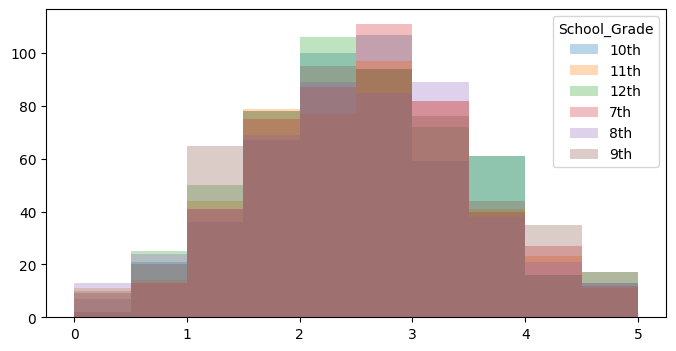

,mean,var,count
School_Grade,,,
10th,2.524025,0.922734,487
11th,2.487891,0.945878,479
12th,2.463894,1.013978,529
7th,2.540040,0.919583,497
8th,2.469917,1.030382,482
9th,2.510456,1.025967,526


In [8]:
groups = df.groupby('School_Grade')
plt.figure()
grades = []
for name, g in groups:
    arr = g[col].values
    grades.append(name)
    plt.hist(arr, alpha=0.3, label=str(name))
plt.legend(title='School_Grade')
plt.show()

grp_stats = groups[col].agg(['mean', 'var', 'count'])
grp_stats

Сильных отличий нет, но в 10-ом, 11-ом и 7-ом классах дисперсия немного ниже.